In [ ]:
import torch
import numpy as np

In [ ]:
t = torch.rand(3, 5)
t_tr = torch.transpose(t, 1, 0)
t_tr

tensor([[0.1403, 0.8520, 0.6943],
        [0.9580, 0.1384, 0.2192],
        [0.8854, 0.9884, 0.9632],
        [0.2042, 0.8095, 0.3758],
        [0.6477, 0.7800, 0.8359]])

In [ ]:
t = torch.zeros(1, 2, 1, 4, 1)

In [ ]:
torch.squeeze(t, [0,2]).shape

torch.Size([2, 4, 1])

In [ ]:
torch.manual_seed(1)
t1 = 2 * torch.rand(5, 2) - 1
t2 = torch.normal(mean=0, std=1, size=(5, 2))

In [ ]:
t3 = torch.multiply(t1, t2)
t3

tensor([[ 0.4426, -0.3114],
        [ 0.0660, -0.5970],
        [ 1.1249,  0.0150],
        [ 0.1569,  0.7107],
        [-0.0451, -0.0352]])

In [ ]:
t4 = torch.mean(t1, axis=0)
t4

tensor([-0.1373,  0.2028])

In [ ]:
t5 = torch.matmul(t1, torch.transpose(t2, 0, 1))
t5

tensor([[ 0.1312,  0.3860, -0.6267, -1.0096, -0.2943],
        [ 0.1647, -0.5310,  0.2434,  0.8035,  0.1980],
        [-0.3855, -0.4422,  1.1399,  1.5558,  0.4781],
        [ 0.1822, -0.5771,  0.2585,  0.8676,  0.2132],
        [ 0.0330,  0.1084, -0.1692, -0.2771, -0.0804]])

In [ ]:
t = torch.rand(6)
t_splits = torch.chunk(t, 3)
[item for item in t_splits]

[tensor([0.6397, 0.9743]), tensor([0.8300, 0.0444]), tensor([0.0246, 0.2588])]

In [ ]:
t = torch.rand(5)
t_splits = torch.split(t, split_size_or_sections=[4, 1])
[item for item in t_splits]

[tensor([0.9391, 0.4167, 0.7140, 0.2676]), tensor([0.9906])]

In [ ]:
a = torch.ones(3)
b = torch.ones(2)
c = torch.cat([a, b], axis=0)
c

tensor([1., 1., 1., 1., 1.])

In [ ]:
a = torch.ones(3)
b = torch.zeros(3)
s = torch.stack([a, b], axis=1)
s

tensor([[1., 0.],
        [1., 0.],
        [1., 0.]])

In [ ]:
from torch.utils.data import DataLoader

t = torch.arange(6, dtype=torch.float32)

data_loader = DataLoader(t)

In [ ]:
[i for i in data_loader]

[tensor([0.]),
 tensor([1.]),
 tensor([2.]),
 tensor([3.]),
 tensor([4.]),
 tensor([5.])]

In [ ]:
data_loader = DataLoader(t, batch_size=3, drop_last=False)
for i, batch in enumerate(data_loader):
  print(f"batch {i+1}: ",batch)

batch 1:  tensor([0., 1., 2.])
batch 2:  tensor([3., 4., 5.])


In [ ]:
from torch.utils.data import Dataset
class JoinDataset(Dataset):
  def __init__(self, x, y):
    self.x = x
    self.y = y
  def __len__(self):
    return len(self.x)
  def __getitem__(self, idx):
    return self.x[idx], self.y[idx]
    #leni alıp getiteme index olarak veriyor galiba. o yüzden yazmayı unutma

In [ ]:
torch.manual_seed(1)
t_x = torch.rand([4, 3], dtype=torch.float32)
t_y = torch.arange(4)

In [ ]:
join_dataset = JoinDataset(t_x, t_y)

In [ ]:
for example in join_dataset:
  print(example)

(tensor([0.7576, 0.2793, 0.4031]), tensor(0))
(tensor([0.7347, 0.0293, 0.7999]), tensor(1))
(tensor([0.3971, 0.7544, 0.5695]), tensor(2))
(tensor([0.4388, 0.6387, 0.5247]), tensor(3))


In [ ]:
next(iter(join_dataset))

(tensor([0.7576, 0.2793, 0.4031]), tensor(0))

In [ ]:
torch.manual_seed(1)
data_loader = DataLoader(dataset=join_dataset, batch_size=2, shuffle=True)

In [ ]:
for i, batch in enumerate(data_loader, 1):
  print(f"batch {i}: ", "x:", batch[0],
        "\n           y:", batch[1])

batch 1:  x: tensor([[0.3971, 0.7544, 0.5695],
        [0.7576, 0.2793, 0.4031]]) 
           y: tensor([2, 0])
batch 2:  x: tensor([[0.7347, 0.0293, 0.7999],
        [0.4388, 0.6387, 0.5247]]) 
           y: tensor([1, 3])


In [ ]:
import torchvision

image_path = "./"
celeba_dataset = torchvision.datasets.CelebA(
    image_path, split="train", target_type="attr", download="True"
)

1443490838it [00:19, 75207645.06it/s]
26721026it [00:00, 68510909.52it/s]
3424458it [00:00, 179286980.73it/s]
6082035it [00:00, 24958788.72it/s]
12156055it [00:00, 22840921.46it/s]
2836386it [00:00, 182466987.92it/s]


In [ ]:
assert isinstance(celeba_dataset, torch.utils.data.Dataset)

In [ ]:
example = next(iter(celeba_dataset))
print(example)

(<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=178x218 at 0x7FC36CDB8CA0>, tensor([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1]))


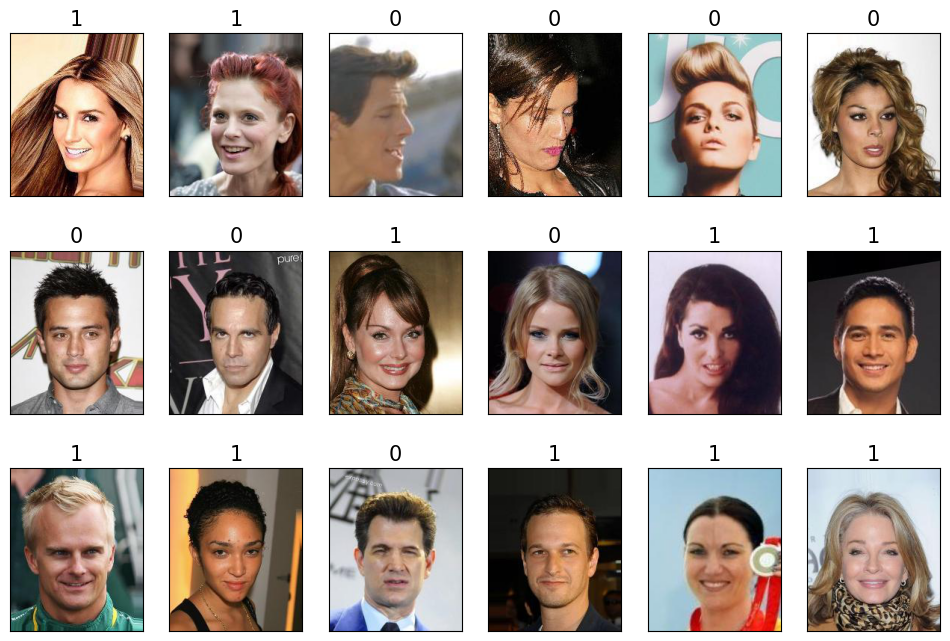

In [ ]:
from itertools import islice
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 8))
for i, (image, attributes) in islice(enumerate(celeba_dataset), 18):
  ax = fig.add_subplot(3, 6, i+1)
  ax.set_xticks([])
  ax.set_yticks([])
  ax.imshow(image)
  ax.set_title(f"{attributes[31]}", size=15)
plt.show()

(<PIL.Image.Image image mode=L size=28x28 at 0x7FC369D634C0>, 5)


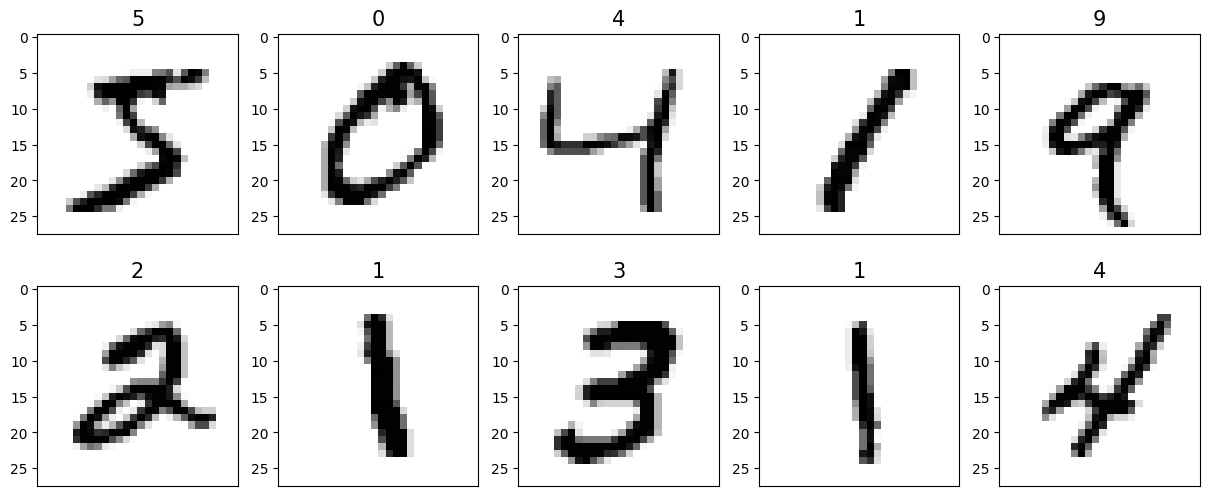

In [ ]:
mnist_dataset = torchvision.datasets.MNIST(image_path, "train", download="True")
assert isinstance(mnist_dataset, torch.utils.data.Dataset)
example = next(iter(mnist_dataset))
print(example)
fig = plt.figure(figsize=(15, 6))
for i, (image, label) in islice(enumerate(mnist_dataset), 10):
  ax = fig.add_subplot(2, 5, i+1)
  ax.set_xticks([])
  ax.imshow(image, cmap="gray_r")
  ax.set_title(f"{label}", size=15)
plt.show()

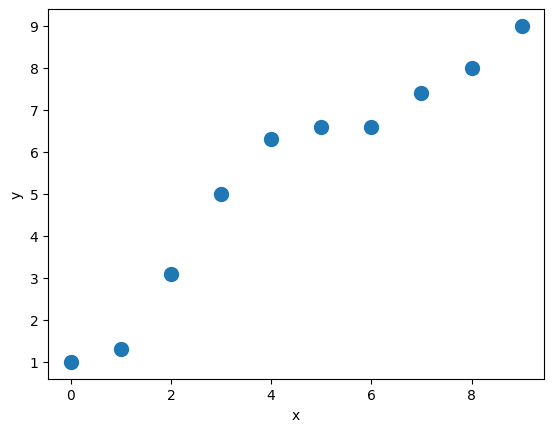

In [ ]:
X_train = np.arange(10, dtype="float32").reshape((10, 1))
y_train = np.array([1.0, 1.3, 3.1, 5.0, 6.3,
                    6.6, 6.6, 7.4, 8.0, 9.0], dtype="float32")
plt.plot(X_train, y_train, "o", markersize=10)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [ ]:
from torch.utils.data import TensorDataset

X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
X_train_norm = torch.from_numpy(X_train_norm)
y_train = torch.from_numpy(y_train)
train_ds = TensorDataset(X_train_norm, y_train)
batch_size=1
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [ ]:
torch.manual_seed(1)
weight = torch.randn(1)
weight.requires_grad_()
bias = torch.zeros(1, requires_grad=True)

def model(xb):
  return xb @ weight + bias

def loss_fn(input, target):
  return (input - target).pow(2).mean()

In [ ]:
learning_rate = .001
num_epochs = 200
log_epochs = 10
for epoch in range(num_epochs):
  for x_batch, y_batch in train_dl:
    pred = model(x_batch)
    loss = loss_fn(pred, y_batch)
    loss.backward()
  with torch.no_grad():
    weight -= weight.grad * learning_rate
    bias -= bias.grad * learning_rate
    weight.grad.zero_()
    bias.grad.zero_()
  if epoch % log_epochs == 0:
    print(f"Epoch {epoch} Loss {loss.item():.4f}")

Epoch 0 Loss 0.2666
Epoch 10 Loss 0.7970
Epoch 20 Loss 1.7185
Epoch 30 Loss 0.1585
Epoch 40 Loss 0.2133
Epoch 50 Loss 0.2666
Epoch 60 Loss 0.0233
Epoch 70 Loss 0.5316
Epoch 80 Loss 1.0892
Epoch 90 Loss 0.5316
Epoch 100 Loss 0.1585
Epoch 110 Loss 0.0550
Epoch 120 Loss 0.0157
Epoch 130 Loss 0.2133
Epoch 140 Loss 0.0157
Epoch 150 Loss 0.2133
Epoch 160 Loss 0.2666
Epoch 170 Loss 0.5316
Epoch 180 Loss 0.7970
Epoch 190 Loss 0.0233


In [ ]:
print(f"Final parameters: ", weight.item(), bias.item())

Final parameters:  2.5328240394592285 5.429988384246826


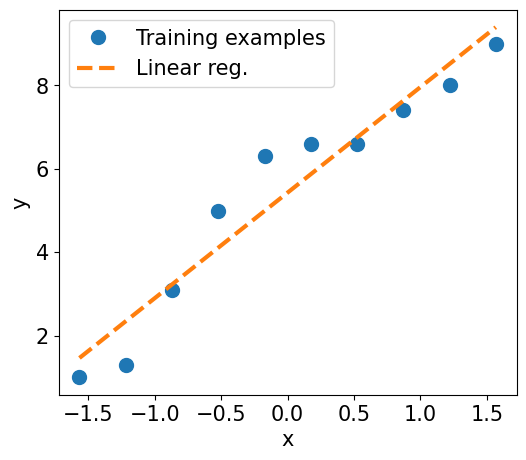

In [ ]:
X_test = np.linspace(0, 9, num=100, dtype="float32").reshape(-1, 1)
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm)
y_pred = model(X_test_norm).detach().numpy() #detach will never require grad
fig = plt.figure(figsize=(13, 5))
ax = fig.add_subplot(1, 2, 1)
plt.plot(X_train_norm, y_train, "o", markersize=10)
plt.plot(X_test_norm, y_pred, "--", lw=3)
plt.legend(["Training examples", "Linear reg."], fontsize=15)
ax.set_xlabel("x", size=15)
ax.set_ylabel("y", size=15)
ax.tick_params(axis="both", which="major", labelsize=15)
plt.show()

In [ ]:
import torch.nn as nn

loss_fn = nn.MSELoss(reduction="mean")
input_size = 1
output_size = 1
model = nn.Linear(input_size, output_size)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
for epoch in range(num_epochs):
  for x_batch, y_batch in train_dl:
    pred = model(x_batch)[:,0]
    loss = loss_fn(pred, y_batch)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
  if epoch % log_epochs == 0:
    print(f"Epoch {epoch} Loss {loss.item():.4f}")

Epoch 0 Loss 55.5135
Epoch 10 Loss 58.7229
Epoch 20 Loss 10.1261
Epoch 30 Loss 0.1175
Epoch 40 Loss 11.0426
Epoch 50 Loss 5.1728
Epoch 60 Loss 0.4371
Epoch 70 Loss 5.8340
Epoch 80 Loss 2.5001
Epoch 90 Loss 1.4908
Epoch 100 Loss 3.6780
Epoch 110 Loss 0.3750
Epoch 120 Loss 2.9534
Epoch 130 Loss 0.2003
Epoch 140 Loss 0.9406
Epoch 150 Loss 2.3588
Epoch 160 Loss 0.9915
Epoch 170 Loss 0.0521
Epoch 180 Loss 2.0613
Epoch 190 Loss 0.2109


In [ ]:
print(f"Final parameters:", model.weight.item(), model.bias.item())

Final parameters: 2.4764349460601807 5.336965084075928


In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X = iris["data"]
y = iris["target"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.3, random_state=1)

In [ ]:
X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
X_train_norm = torch.from_numpy(X_train_norm).float()
y_train = torch.from_numpy(y_train)
train_ds = TensorDataset(X_train_norm, y_train)
torch.manual_seed(1)
batch_size = 2
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [ ]:
class Model(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super().__init__()
    self.layer1 = nn.Linear(input_size, hidden_size)
    self.layer2 = nn.Linear(hidden_size, output_size)
  def forward(self, x):
    x = self.layer1(x)
    x = nn.Sigmoid()(x)
    x = self.layer2(x)
    x = nn.Softmax(dim=1)(x)
    return x

In [ ]:
input_size = X_train_norm.shape[1]
hidden_size = 16
output_size = 3
model = Model(input_size, hidden_size, output_size)

In [ ]:
learning_rate = .001
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
num_epochs = 100
loss_hist = [0] * num_epochs
accuracy_hist = [0] * num_epochs
for epoch in range(num_epochs):
  for x_batch, y_batch in train_dl:
    pred = model(x_batch)
    loss = loss_fn(pred, y_batch)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    loss_hist[epoch] += loss.item()*y_batch.size(0)
    is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
    accuracy_hist[epoch] += is_correct.mean()
  loss_hist[epoch] /= len(train_dl.dataset)
  accuracy_hist[epoch] /= len(train_dl.dataset)

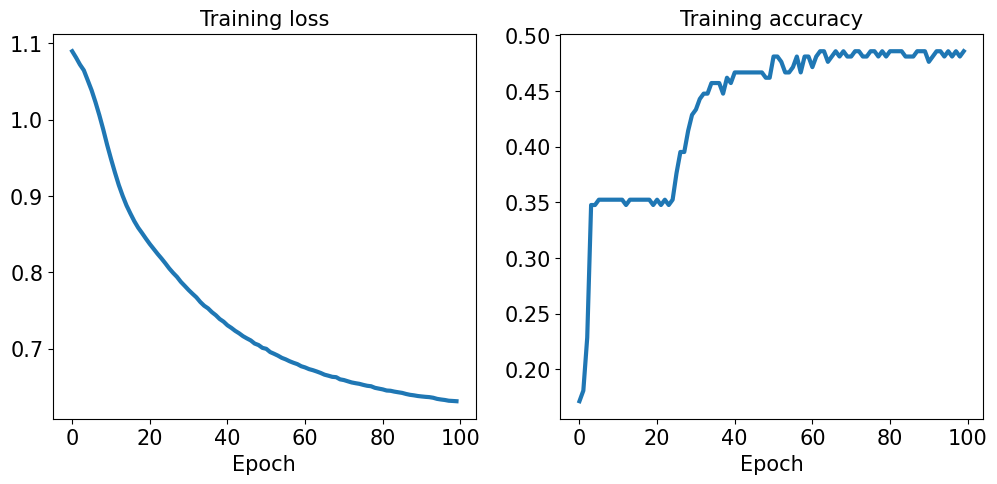

In [ ]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(loss_hist, lw=3)
ax.set_title('Training loss', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax = fig.add_subplot(1, 2, 2)
ax.plot(accuracy_hist, lw=3)
ax.set_title('Training accuracy', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [ ]:
path = "iri_classifier.pt"
torch.save(model, path)

In [ ]:
model_new = torch.load(path)

In [ ]:
model.eval()

Model(
  (layer1): Linear(in_features=4, out_features=16, bias=True)
  (layer2): Linear(in_features=16, out_features=3, bias=True)
)